In [3]:
import warnings
warnings.filterwarnings("ignore")
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
security_df = pd.read_csv('full_dataset_normalized.csv',sep=",")

In [5]:
security_df_selected_columns = security_df[['Vols_normalized',
       'Cambriolages à domicile ou violaiton de domicile_normalized',
       'Crimes ou délits sexuelles_normalized',
       'Infractions liées aux stupéfiants_normalized',
       'Dégradations ou destructions de biens volontaires_normalized',
       'Violences_normalized', 'Falsifications et contrefaçons_normalized',
       'Délits Économiques et Financiers_normalized',
       "Irégularités de Main-d'oeuvre_normalized", "code_dep"]]

In [6]:
security_df_selected_columns_by_dept = security_df_selected_columns.groupby('code_dep').mean().reset_index()

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

colonnes_pca = ['Vols_normalized',
       'Cambriolages à domicile ou violaiton de domicile_normalized',
       'Crimes ou délits sexuelles_normalized',
       'Infractions liées aux stupéfiants_normalized',
       'Dégradations ou destructions de biens volontaires_normalized',
       'Violences_normalized', 'Falsifications et contrefaçons_normalized',
       'Délits Économiques et Financiers_normalized',
       "Irégularités de Main-d'oeuvre_normalized"]


donnees_pca = security_df_selected_columns_by_dept[colonnes_pca]
donnees_pca_standardisees = StandardScaler().fit_transform(donnees_pca)

# Application de la PCA
pca = PCA()
resultats_pca = pca.fit(donnees_pca_standardisees)

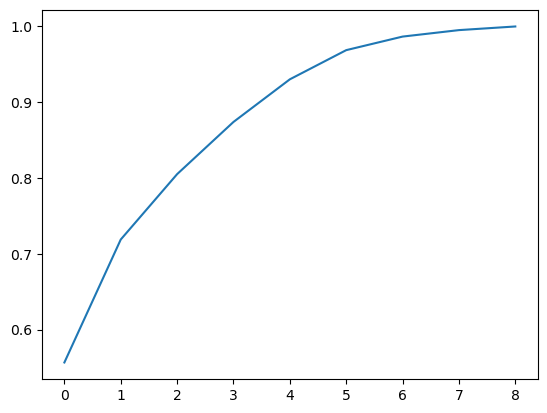

In [8]:
plt.plot(np.cumsum(resultats_pca.explained_variance_ratio_))

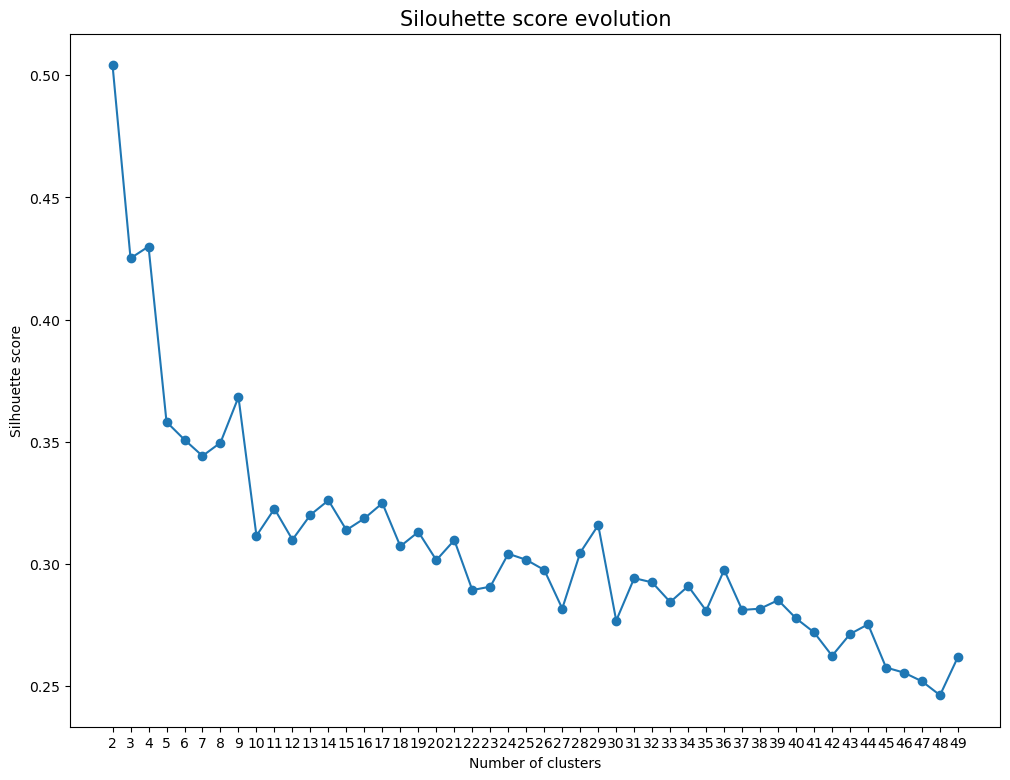

In [9]:
resultats_pca_df = pd.DataFrame(resultats_pca.transform(donnees_pca_standardisees)[:, :3], columns=['PCA1', 'PCA2', 'PCA3'])
resultats_pca_df['dept'] = security_df_selected_columns_by_dept['code_dep']

best_nb_cluster = tools.best_nb_cluster(
        resultats_pca_df,
        ['PCA1', 'PCA2', 'PCA3'],
        2,
        50,
        True,
        "Silouhette score evolution"
)

In [12]:
labels = tools.clustering(resultats_pca_df,
                 ['PCA1', 'PCA2', 'PCA3'],
                 2)

In [17]:
resultats_pca_df['Cluster'] = labels

In [18]:
resultats_pca_df

,PCA1,PCA2,PCA3,dept,Cluster
0,-1.547274,0.455331,0.711950,61,1
1,1.007305,-0.484214,1.866928,62,1
2,-1.385071,-0.280725,-0.582823,63,1
3,-1.435954,-0.399637,-0.635983,64,1
4,-1.253512,-0.203314,-0.749644,65,1
...,...,...,...,...,...
97,-1.520701,-0.000463,-0.009358,58,1
98,2.447762,-1.036810,1.497436,59,0
99,0.485160,-0.404672,0.339282,60,1
100,0.370494,1.497832,3.641352,61,1


In [ ]:
departements_geojson_name = 'departements.geojson'
gdf_departements = gpd.read_file(departements_geojson_name)